In [94]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

sns.set(rc={'figure.figsize':(27,13)})

In [95]:
# очистим от дубликатов строк и отсортируем по времени
df = pd.read_csv("./profeat-data-for-assignment.csv").drop_duplicates().sort_values("dateTime")

In [96]:
#создадим копию, для возможности обработки пустых значений
df_copy = df.copy()


In [97]:
"""ПРЕОБРАЗОВАНИЕ ФОРМАТОВ ДАННЫХ"""
#преобразуем в формат строк
str_type_columns = df.loc[:,~df.columns.isin(["dateTime"])].columns.to_list()
df[str_type_columns] = df.loc[:,df.columns.isin(str_type_columns)].astype(str)
#преобразуем в формат даты
df['dateTime'] = pd.to_datetime(df.dateTime, infer_datetime_format=True)


In [98]:
"""ИССЛЕДОВАНИЕ И ФИЛЬТРАЦИЯ ДАННЫХ"""
#определяем нужные нам типы событий и фильтруем
events_type_to_test = ["landing.unique-visit","register-confirm-code-success","editor.add.click","editor-link.copy.click","payment.attempt","payment.success"]
df = df.loc[df.event.isin(events_type_to_test)]

In [99]:
"""
ОПИСАНИЕ КОЛОНОК
localUserId — идентификатор пользователя (уникальный браузер)  

cmUserId  идентификатор зарегестрированного пользователя (уникальный аккаунт)  

dateTime — дата события

utm_campaign — название кампании 

utm_source — источник трафика 

utm_medium — название типа кампании 

initReferrer - сайт, с которого пользователь совершил переход на profeat.site

os — операционная система пользователя 

browser — браузер пользователя 

blockid — уникальный идентификатор блока, из которых состоит сайт, с которым произошло событие; тип блока содержится в названии события

event — произошедшее событие 
"""

'\nОПИСАНИЕ КОЛОНОК\nlocalUserId — идентификатор пользователя (уникальный браузер)  \n\ncmUserId  идентификатор зарегестрированного пользователя (уникальный аккаунт)  \n\ndateTime — дата события\n\nutm_campaign — название кампании \n\nutm_source — источник трафика \n\nutm_medium — название типа кампании \n\ninitReferrer - сайт, с которого пользователь совершил переход на profeat.site\n\nos — операционная система пользователя \n\nbrowser — браузер пользователя \n\nblockid — уникальный идентификатор блока, из которых состоит сайт, с которым произошло событие; тип блока содержится в названии события\n\nevent — произошедшее событие \n'

In [100]:
#отметим что временной промежуток данных 1 месяц
df


,localUserId,cmUserId,dateTime,utm_source,utm_medium,utm_campaign,initReferrer,browser,os,event,blockid
3287,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,nan,2022-04-01 00:35:39.791000+00:00,yandex,cpc,72411577,https://yandex.ru/,Mobile Safari,iOS,landing.unique-visit,nan
2356,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,624648ea80bb4500440a5ca7,2022-04-01 00:35:54.088000+00:00,nan,nan,nan,nan,Mobile Safari,iOS,register-confirm-code-success,nan
3306,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,624648ea80bb4500440a5ca7,2022-04-01 00:36:44.991000+00:00,yandex,cpc,72411577,https://contact-me.info/?utm_source=yandex&utm...,Mobile Safari,iOS,editor.add.click,nan
3307,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,624648ea80bb4500440a5ca7,2022-04-01 00:36:58.175000+00:00,yandex,cpc,72411577,https://contact-me.info/?utm_source=yandex&utm...,Mobile Safari,iOS,editor.add.click,nan
3308,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,624648ea80bb4500440a5ca7,2022-04-01 00:37:07.627000+00:00,yandex,cpc,72411577,https://contact-me.info/?utm_source=yandex&utm...,Mobile Safari,iOS,editor.add.click,nan
...,...,...,...,...,...,...,...,...,...,...,...
50633,231c76df-62d8-4367-94f9-d7e9afd647a2,nan,2022-05-01 23:36:27.806000+00:00,nan,nan,nan,https://nakedtt.fun/,Instagram,Android,landing.unique-visit,nan
51139,62d8b07a-10b9-474a-a468-e7da68b4a34c,nan,2022-05-01 23:40:46.784000+00:00,nan,nan,nan,nan,Mobile Safari,iOS,landing.unique-visit,nan
51190,56a7222b-aaa0-499e-abf2-71b5aa2624ec,nan,2022-05-01 23:50:24.835000+00:00,nan,nan,nan,https://nakedtt.fun/,Chrome,Android,landing.unique-visit,nan
50634,5af1e1ee-3a2f-441a-a3a5-5b0bf972194f,nan,2022-05-01 23:51:31.498000+00:00,nan,nan,nan,https://nakedtt.fun/,Chrome,Android,landing.unique-visit,nan


In [101]:
#добавим колонку с датами
df["date"] = df.dateTime.dt.date


In [102]:
# переименуем события в новой колонке для более комфортного восприятия
rename_dict = {
    'landing.unique-visit': 'landing',
    'register-confirm-code-success': 'reg',
    'editor.add.click': 'add_click',
    'editor-link.copy.click': "link_copy",
    'payment.attempt': "payment_click",
    'payment.success' : "payment_success"
}

def rename_event (event):
  if event in rename_dict:
    return rename_dict[event]

df["rename_event"] = df.event.map(rename_event)

In [103]:
# кол-во уникальных пользователей
df.localUserId.nunique()

8515

In [104]:
# просмотрим топ-20 пользователей по количеству действий, есть подозрительно активные
top_20_users = df.localUserId.value_counts().head(20).index

In [105]:
# анализ данных проявил несколько спорных моментов - вопросов:
# самый активный пользователь совершил 206 переходов на лэндинг, выполненные с различных устройств, вероятнее всего это тестировщик ПО, вероятно можно исключить из анализа
# никто из топ-20 не "копировал ссылку"
# присутствует множество повторных действий от одних и тех же пользователей, нам интересны только уникальные действия для каждого пользователя (учет веса каждого пользователя - это отдельный вопрос)
# некоторые пользователи начали свой цикл действий раньше выбранного месяца - зарегистрировались не зайдя на лендинг, или кликали "добавить" без регистрации, что невозможно в реализации сайта
# потому, чтобы воронка была корректно убывающей будем учитывать только пользователей с корректным циклом
pd.pivot_table(df.loc[df.localUserId.isin(top_20_users)], values='event', index='localUserId', columns='rename_event', aggfunc='count', fill_value=0)\
  .reindex(columns=['landing','reg','add_click','payment_click','payment_success'])


rename_event,landing,reg,add_click,payment_click,payment_success
localUserId,,,,,
118c5836-8baa-4a5f-9ca7-e1299b9b4335,0,1,49,0,0
218f1ab4-a78b-4ec2-9c1a-dac0cc8f0702,1,0,77,0,0
221a4c33-7275-40f6-8ddd-b195eeb200c3,1,1,49,0,0
3aa66d70-f2a8-47f8-9908-c5980c6869bd,1,1,52,0,0
3d56ed54-41d8-4cf5-a73a-07263120819f,1,1,71,0,0
3f2fa233-444b-4e87-a5c4-0277499c4be4,196,0,0,0,0
4d59343b-abaa-40b6-b693-f1e7da558b74,1,2,55,8,2
56ec6455-89f1-4026-88a5-34459b954b40,1,1,100,0,0
59c9cf22-aa70-4010-be2b-bc4acc47cf30,0,1,136,0,0


In [106]:
# уберем тестировщика, а также сохраним только уникальные действия для каждого пользователя (чтобы посчитать кол-во пользователей для каждого этапа конверсии)
df = df.loc[df.localUserId != '3f2fa233-444b-4e87-a5c4-0277499c4be4'].drop_duplicates(subset=['localUserId',"rename_event"])

In [107]:
df_pivot_count = pd.pivot_table(df, values='event', index='localUserId', columns='rename_event', aggfunc='count', fill_value=0)\
  .reindex(columns=['landing','reg','add_click','payment_click','payment_success'])
df_pivot_count

rename_event,landing,reg,add_click,payment_click,payment_success
localUserId,,,,,
00013966-a3f9-4364-a9dc-3b4525ee22a1,1,0,1,0,0
0011b336-bb36-4250-9185-d4418e74c114,1,0,0,0,0
001aac7d-ae7f-49c8-b478-6c663afa7f04,0,0,1,0,0
001fc42c-4d45-43d2-b0a5-91e1f0331e3f,1,0,0,0,0
002011f5-e472-4437-b346-6827dc11243e,1,0,0,0,0
...,...,...,...,...,...
ffe0c2c2-ac8a-427c-9167-b92688a9f2d7,1,0,1,0,0
ffe766e2-291b-4223-a5b7-42252883834f,0,1,1,0,0
ffec1738-b92c-4625-a9ad-cb2f0db5b962,1,0,0,0,0


In [108]:
# оставим тех пользователей, у которых выполнена линейная последовательность в действиях (landing->reg->add_click->payment_click->payment_success)
df_pivot_count = df_pivot_count[(df_pivot_count.landing >= df_pivot_count.reg)&
                  (df_pivot_count.reg >= df_pivot_count.add_click)&
                    (df_pivot_count.add_click >= df_pivot_count.payment_click)& 
                      (df_pivot_count.payment_click >= df_pivot_count.payment_success)]\
                        .sort_values(['landing','reg','add_click','payment_click','payment_success'], ascending = False)
df_pivot_count                        

rename_event,landing,reg,add_click,payment_click,payment_success
localUserId,,,,,
0e9d0cc1-e19c-46a8-8947-b6caf0d8f752,1,1,1,1,1
4d59343b-abaa-40b6-b693-f1e7da558b74,1,1,1,1,1
840db068-05fa-4b49-9c16-fa321ba63d28,1,1,1,1,1
86693647-cdf5-4c38-8345-b15ecfb47140,1,1,1,1,1
8721efbd-3bc5-4531-bbee-ed8188a1e718,1,1,1,1,1
...,...,...,...,...,...
ffd9cb0e-50c1-47ff-a171-c14a79deae56,1,0,0,0,0
ffdd6e5f-70f2-4df0-a6c4-ad4ac58f2498,1,0,0,0,0
ffec1738-b92c-4625-a9ad-cb2f0db5b962,1,0,0,0,0


In [109]:
# оказывается никто не "копировал ссылку", видимо можно не отображать в воронке конверсии данный этап
df.loc[df.event == "editor-link.copy.click"].count()


localUserId     0
cmUserId        0
dateTime        0
utm_source      0
utm_medium      0
utm_campaign    0
initReferrer    0
browser         0
os              0
event           0
blockid         0
date            0
rename_event    0
dtype: int64

In [110]:
# данные о количестве корректных пользователей для воронки
df_pivot_count.sum()

rename_event
landing            7251
reg                1151
add_click           958
payment_click        53
payment_success      11
dtype: int64

In [111]:
"""Обработка пустых значений"""
# для отобранных пользователей разберемся с пустыми значениями
df = df.loc[df.localUserId.isin(df_pivot_count.index.values.tolist())]
df[["cmUserId","utm_source","utm_medium","utm_campaign","initReferrer","browser","os","blockid"]].applymap(lambda x: 1 if x=='nan' else 0).sum()
# пустые значения в cmUserId образуются для незарегистрированных пользователей, так как этот момент уже обработан можно просто убрать столбец
# пустые значения в blockid нам также не интересны, т.к. вся информация о блоках уже использована, можно убрать столбец
# по остальным колонкам посмотрим статистику распределения значений не пустых полей, и заполним пустые в соответствии с этим распределением
# учитывая, что нам не нужно предсказывать значения параметров конкретного пользователя, а нужны средние значения за период для фильтрации, то можем просто заполнить рандомно  

cmUserId        7174
utm_source      3008
utm_medium      3943
utm_campaign    3938
initReferrer    2286
browser            6
os                17
blockid         9424
dtype: int64

In [112]:
df = df.drop(["cmUserId","blockid","dateTime","event"], axis=1)
df.head(5)

,localUserId,utm_source,utm_medium,utm_campaign,initReferrer,browser,os,date,rename_event
3287,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,yandex,cpc,72411577,https://yandex.ru/,Mobile Safari,iOS,2022-04-01,landing
2356,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,nan,nan,nan,nan,Mobile Safari,iOS,2022-04-01,reg
3306,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,yandex,cpc,72411577,https://contact-me.info/?utm_source=yandex&utm...,Mobile Safari,iOS,2022-04-01,add_click
3839,2242e9b9-3c32-4115-8098-3735ae85b884,yandex,cpc,72412683,https://yandex.kz/,Chrome,Android,2022-04-01,landing
3584,c577bda5-695e-4d8d-8b16-4bf369614178,yandex,cpc,72411577,https://yandex.ru/,Chrome,Android,2022-04-01,landing


In [113]:
# перед заполнением пустых полей в initReferrer стоит вытащить имя сайта из ссылки, которое находится между символами // и /
def find_between( string_reffer, first = "//", last = "/"):
    try:
        start = string_reffer.index( first ) + len( first )
        end = string_reffer.index( last, start )
        return string_reffer[start:end]
    except ValueError:
        return ""

df["initReferrer"] = df.initReferrer.apply(lambda x: find_between(x) if x != 'nan' else x)

<AxesSubplot:xlabel='os', ylabel='Count'>

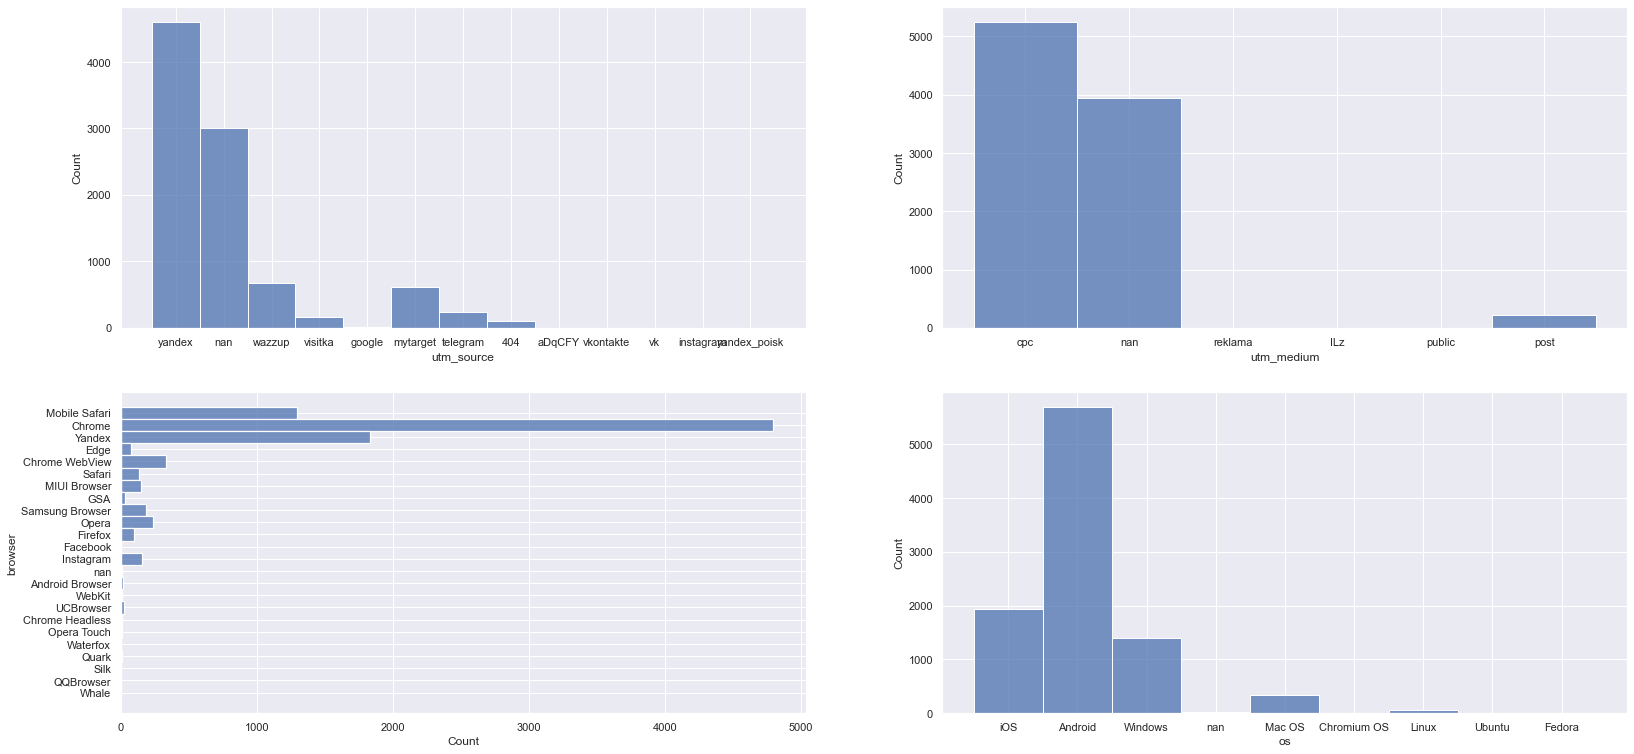

In [114]:
fig, axs = plt.subplots(2,2)
sns.histplot(data = df, x='utm_source',  kde=False, ax = axs[0,0])
sns.histplot(data = df, x='utm_medium',  kde=False, ax = axs[0,1])
sns.histplot(data = df, y='browser',  kde=False, ax = axs[1,0])
sns.histplot(data = df, x='os',  kde=False, ax = axs[1,1])
# как видно явно доминируют несколько вариантов

In [115]:
# формируем список колонок с пустыми значениями
df_columns_with_nan = ["utm_source","utm_medium","utm_campaign","initReferrer","browser","os"]

def fill_nan_data(top_share_name, top_share_val):
  # принимает списки имен и соответствующие им веса
  # возвращает случайное имя из списка, вероятность которого выпала 
  return random.choices(top_share_name, weights=top_share_val, k=1)[0]

for colum_name in df_columns_with_nan:
  # вычисляем доли по популярности для каждой колонки, используем их для генерации взвешенных рандомных значений
  top_share_val = df.loc[df[colum_name] != 'nan'][colum_name].value_counts(normalize = True).round(3).tolist()
  # записываем в список соответствующие им имена 
  top_share_name = df.loc[df[colum_name] != 'nan'][colum_name].value_counts(normalize = True).index.tolist()
  # заполняем колонки
  df[colum_name] = df[colum_name].apply(lambda x: fill_nan_data(top_share_name, top_share_val) if x == 'nan' else x)
  
# проверим, пустых полей больше нет
df.applymap(lambda x: 1 if x=='nan' else 0).sum()


localUserId     0
utm_source      0
utm_medium      0
utm_campaign    0
initReferrer    0
browser         0
os              0
date            0
rename_event    0
dtype: int64

In [116]:
# работа с данными завершена, переименуем колонки и названия действий для более удобного восприятия при визуализации

rename_dict = {
    'landing' : "Переход на лэндинг",
    'reg' : "Регистрация",
    'add_click' : "Добавить блок",
    "link_copy" : "Скопировать ссылку",
    "payment_click" : "Клик на кнопку покупка",
    "payment_success" : "Успешная покупка"
}

def rename_event (event):
  if event in rename_dict:
    return rename_dict[event]

df["rename_event"] = df.rename_event.apply(lambda x: rename_event(x))  

df = df.rename(columns={"utm_source":"источник_трафика", 
                   "utm_medium":"тип_кампании", 
                   "utm_campaign":"название_кампании", 
                   "initReferrer":"имя_сайта_источника", 
                   "browser":"браузер", 
                   "os":"операционная_система", 
                   "date":"дата", 
                   "rename_event":"действие"})

In [117]:
df.to_csv("./wazzup_test_df_new.csv")

In [118]:
df

,localUserId,источник_трафика,тип_кампании,название_кампании,имя_сайта_источника,браузер,операционная_система,дата,действие
3287,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,yandex,cpc,72411577,yandex.ru,Mobile Safari,iOS,2022-04-01,Переход на лэндинг
2356,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,yandex,cpc,72412889,yandex.ru,Mobile Safari,iOS,2022-04-01,Регистрация
3306,cda0b4b7-09bb-49dd-aa22-da5108cae2f0,yandex,cpc,72411577,contact-me.info,Mobile Safari,iOS,2022-04-01,Добавить блок
3839,2242e9b9-3c32-4115-8098-3735ae85b884,yandex,cpc,72412683,yandex.kz,Chrome,Android,2022-04-01,Переход на лэндинг
3584,c577bda5-695e-4d8d-8b16-4bf369614178,yandex,cpc,72411577,yandex.ru,Chrome,Android,2022-04-01,Переход на лэндинг
...,...,...,...,...,...,...,...,...,...
50633,231c76df-62d8-4367-94f9-d7e9afd647a2,yandex,cpc,72411577,nakedtt.fun,Instagram,Android,2022-05-01,Переход на лэндинг
51139,62d8b07a-10b9-474a-a468-e7da68b4a34c,mytarget,cpc,52150845,yandex.ru,Mobile Safari,iOS,2022-05-01,Переход на лэндинг
51190,56a7222b-aaa0-499e-abf2-71b5aa2624ec,yandex,cpc,72411577,nakedtt.fun,Chrome,Android,2022-05-01,Переход на лэндинг
50634,5af1e1ee-3a2f-441a-a3a5-5b0bf972194f,mytarget,cpc,72411577,nakedtt.fun,Chrome,Android,2022-05-01,Переход на лэндинг


In [119]:
"""
ЗАКЛЮЧЕНИЕ.
Выполнена фильтрация по пользователям - оставлены только начавшие свою работу с сайтом в данный промежуток времени.
Заполнены пустые данные в соответствии с распределением известных.
Посчитаны уникальные пользователи для каждого из этапов воронки.
Как уже было сказано выше - в данной временном промежутке не было данных по этапу "клик на копирование ссылки", потому не имеет смысла вводить этот этап в воронку конверсии.
Однако, можно было бы заменить на этап "клик по ссылке".
Ссылка на основной дашборд <a href=\"https://public.tableau.com/app/profile/nikita6960/viz/Test_Wazzup_new/Dashboard1?publish=yes\">
Данный дашборд будет однозначно полезен, для того чтобы дашборд стал более наглядным можно добавить: 
  -распределение по OS, браузерам и источникам трафика входящих пользователей;
  -вывести информацию о динамике продаж по месяцам (для большего количества данных).
"""

'\nЗАКЛЮЧЕНИЕ.\nВыполнена фильтрация по пользователям - оставлены только начавшие свою работу с сайтом в данный промежуток времени.\nЗаполнены пустые данные в соответствии с распределением известных.\nПосчитаны уникальные пользователи для каждого из этапов воронки.\nКак уже было сказано выше - в данной временном промежутке не было данных по этапу "клик на копирование ссылки", потому не имеет смысла вводить этот этап в воронку конверсии.\nОднако, можно было бы заменить на этап "клик по ссылке".\nДанный дашборд будет однозначно полезен, однако для того чтобы дашборд стал более наглядным и полезным - необходимо в будущем добавить: \n  -распределение лидов на каждом этапе по дням;\n  -распределение конверсии по дням;\n  -распределение по OS, браузерам и источникам трафика входящих пользователей;\n  -вывести информацию о динамике продаж по месяцам (для большего количества данных).\n'